<b><u>PROJECT NAME:-</b> Job Change Prediction of Data Professionals

<b><u>PROJECT TYPE:-</b> Classification

<b><u>CONTRIBUTION:-</b> Individual.

<b><u>OBJECTIVE:-</b> To build a predictive model that can classify whether a person is likely to look for a new job or stay in the current job.

<b><u><h2>Import Libraries:-</b>

In [1]:
# Data handling
import pandas as pd   # Data handling and analysis.
import numpy as np    # Mathematical & numerical operations.(mean, median, std.deviation).

# Visualization
import matplotlib.pyplot as plt   # Data visualization.
import seaborn as sns             # Advanced visualization (built on matplotlib).

In [2]:
# ML Models 
from sklearn.model_selection import train_test_split   # It is used to split dataset in training set and testing set.
from sklearn.preprocessing import StandardScaler       # used for normalize/scale features. 
from sklearn.linear_model import LogisticRegression    # Classification Model (linear). Predicts probability.
from sklearn.neighbors import KNeighborsClassifier     # classified data based on the “k” nearest neighbors.
from sklearn.ensemble import RandomForestClassifier    # Reduces overfitting, gives high accuracy.
from sklearn.svm import SVC                            # Finds the best hyperplane and Good for high-dimensional data.
from sklearn.metrics import accuracy_score             # Used to measure performance of ML models.

<b><u><h2>Load Dataset:-</b>

In [3]:
data = pd.read_csv("E:data/aug_train.csv")
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
data.shape   # used for find total rows and columns in the dataset.

(19158, 14)

In [5]:
data.describe()  # used for summary statistics for numerical columns (mean, std, min, max, quartiles).

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
data.info()  #summary of the DataFrame (column name, Non-null counts, Dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
# Check for null values
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

<b><h3><u>Preprocessing (Simple & Clean):-</b>

In [8]:
# Fill missing values
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['enrolled_university'].fillna(data['enrolled_university'].mode()[0], inplace=True)
data['education_level'].fillna(data['education_level'].mode()[0], inplace=True)
data['major_discipline'].fillna(data['major_discipline'].mode()[0], inplace=True)
data['experience'].fillna(data['experience'].mode()[0], inplace=True)
data['company_size'].fillna(data['company_size'].mode()[0], inplace=True)
data['company_type'].fillna(data['company_type'].mode()[0], inplace=True)
data['last_new_job'].fillna(data['last_new_job'].mode()[0], inplace=True)

#drop column
data = data.drop(columns=['city'])


# convert string Dtype columns into numeric
data['gender'] = data['gender'].replace({'Male': 1, 'Female': 0, 'Other': 2})
data['relevent_experience'] = data['relevent_experience'].replace({'Has relevent experience': 1, 'No relevent experience': 0})
data['enrolled_university'] = data['enrolled_university'].replace({'no_enrollment': 0, 'Full time course': 1, 'Part time course': 2})
data['education_level'] = data['education_level'].replace({'Primary School': 0, 'High School': 1, 'Graduate': 2, 'Masters': 3, 'Phd': 4})
data['major_discipline'] = data['major_discipline'].replace({'STEM': 1, 'Business Degree': 2, 'Arts': 3, 'Humanities': 4, 'Other': 5, 'No Major': 0})
data['experience'] = data['experience'].replace({'>20': 21, '<1': 0, '10/49': 10 }).astype(int)
data['company_type'] = data['company_type'].replace({'Pvt Ltd': 0, 'Funded Startup': 1, 'Early Stage Startup': 2,'NGO': 3, 'Other': 4, 'Public Sector': 5})
data['company_size'] = data['company_size'].replace({'<10': 5, '10/49': 30, '50-99': 75, '100-500': 300,'500-999': 750, '1000-4999': 3000, '5000-9999': 7500,
    '10000+': 10000}).astype(int)
data['last_new_job'] = data['last_new_job'].replace({'>4': 5, 'never': 0}).astype(int)

data.head()


C:\Users\kunwa\AppData\Local\Temp\ipykernel_17196\259315632.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].fillna(data['gender'].mode()[0], inplace=True)
C:\Users\kunwa\AppData\Local\Temp\ipykernel_17196\259315632.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0.920,1,1,0,2,1,21,75,0,1,36,1.0
1,29725,0.776,1,0,0,2,1,15,75,0,5,47,0.0
2,11561,0.624,1,0,1,2,1,5,75,0,0,83,0.0
3,33241,0.789,1,0,0,2,2,0,75,0,0,52,1.0
4,666,0.767,1,1,0,3,1,21,75,1,4,8,0.0


In [9]:
# Separate features and target
x = data.drop(columns=['target'])   # Features
y = data['target']                  # Target variable
y

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

<b><u><h2>Exploratory Data Analysis (EDA):-</b>

<b><u>1. Bar Plot: Gender distribution:-</b>

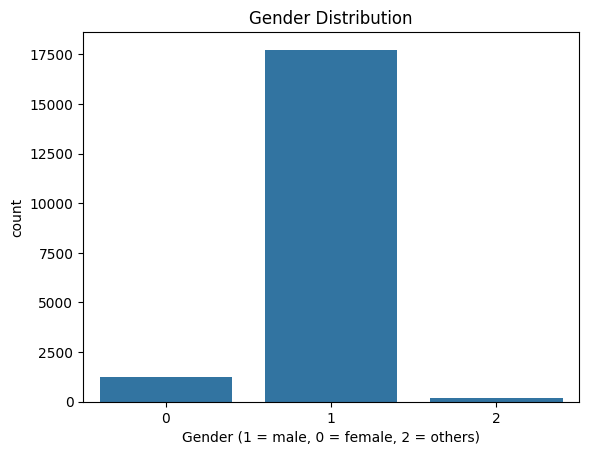

In [10]:
sns.countplot(x='gender', data=data)
plt.title("Gender Distribution")
plt.xlabel("Gender (1 = male, 0 = female, 2 = others)")
plt.show()


<b>-->Majority of candidates are Male (1), while females (0) are fewer.</b>

<b>-->Very few candidates belong to Others (2) category.</b>

<b>-->This imbalance suggests the dataset is male-dominated.</b>

<b><u>2. Grouped bar plot: Gender vs Target (Job Change):-</b>

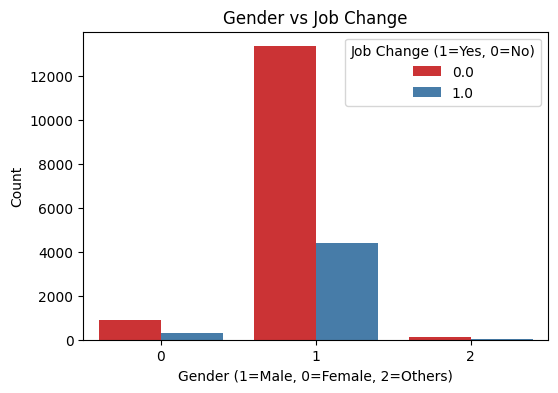

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="target", data=data, palette="Set1")
plt.title("Gender vs Job Change")
plt.xlabel("Gender (1=Male, 0=Female, 2=Others)")
plt.ylabel("Count")
plt.legend(title="Job Change (1=Yes, 0=No)")
plt.show()

<b>->Both males (1) and females (0) show interest in job change.</b>

<b>->Males appear to have a slightly higher proportion of job changes compared to females.</b>

<b>->"Others (2)" category is too small to draw strong conclusions.</b>

<b><u>3. Box Plot: Training hours vs Target:-</b>

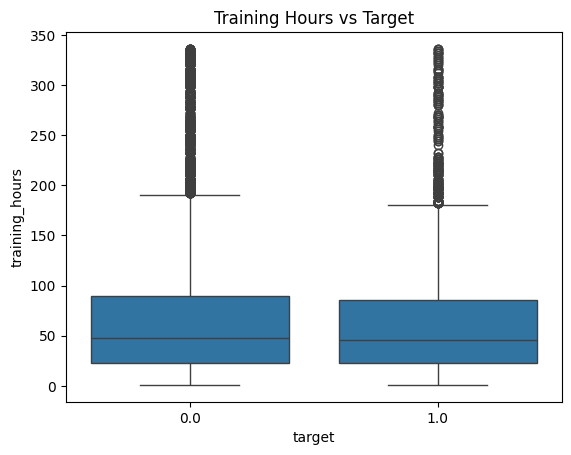

In [12]:
sns.boxplot(x='target', y='training_hours', data=data)
plt.title("Training Hours vs Target")
plt.show()

<b>->Candidates who opted for job change (1) generally have higher training hours.</b>

<b>->Those not changing jobs (0) have lower or moderate training hours.</b>

<b>->Indicates that extra training is linked with willingness to switch jobs.</b>

<b><u>4. Heatmap:-</b>

numeric_data = data.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

<b>->City Development Index shows strong positive correlation with job change tendency.</b>

<b>->Training hours also correlate with target (more training = more likely to switch).</b>

<b>->No severe multicollinearity → dataset is safe for ML modeling.</b>

<b><u>5. Pie Chart (Education level):-</b>

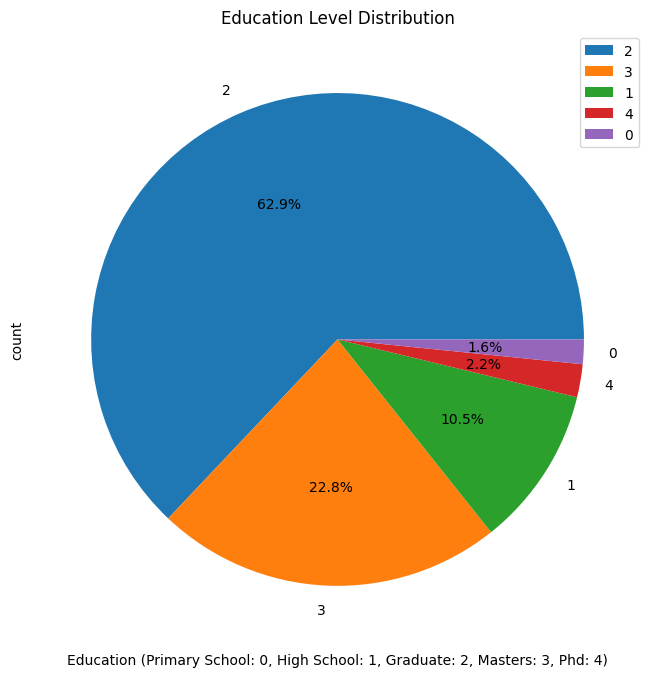

In [16]:
data['education_level'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8))
plt.title("Education Level Distribution")
plt.xlabel("Education (Primary School: 0, High School: 1, Graduate: 2, Masters: 3, Phd: 4)")
plt.legend()
plt.show()

<b>->Majority of candidates belong to Graduate level education.</b>

<b>->A smaller percentage are from Masters/PhD level, indicating fewer highly specialized candidates.</b>

<b><u><h2>Model Building:-<b>

In [14]:
# Split dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=42)

<b><u>(a) Logistic Regression:-</b>

In [15]:
Log_model=LogisticRegression()
predict=Log_model.fit(x_train,y_train)
predict

C:\Users\kunwa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
Log_pred=Log_model.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, Log_pred))

Logistic Regression Accuracy: 0.7539144050104384


<b><u>(b) K-Nearest Neighbors:-</b>

In [18]:
knn_model = KNeighborsClassifier()
predict=knn_model.fit(x_train,y_train)
predict

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
knn_pred = knn_model.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

KNN Accuracy: 0.697286012526096


<b><u>(c) Random Forest:-</b>

In [20]:
rf_model = RandomForestClassifier()
predict = rf_model.fit(x_train,y_train)
predict

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
rf_pred = rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.7656576200417536


<b><u>(d) Support Vector Machine:-</b>

In [22]:
svm_model = SVC()
predict=svm_model.fit(x_train,y_train)
predict

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [23]:
svm_pred = svm_model.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.7515657620041754


<b><u> Model Accuracy Comparison:-</b>

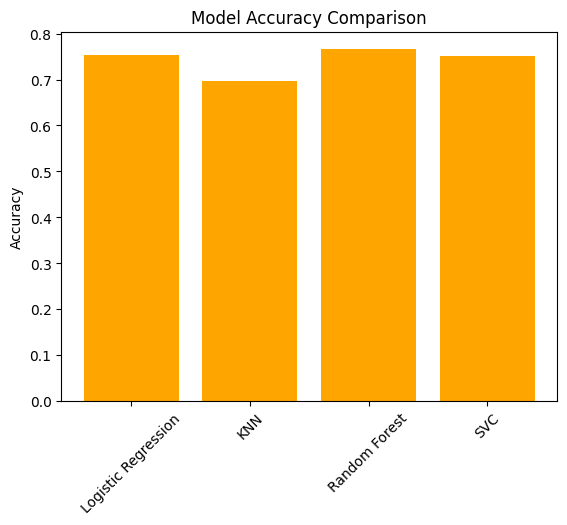

In [25]:
accuracy_results = {
    "Logistic Regression": accuracy_score(y_test, Log_pred),
    "KNN": accuracy_score(y_test, knn_pred),
    "Random Forest": accuracy_score(y_test, rf_pred),
    "SVC": accuracy_score(y_test, svm_pred)
}

plt.bar(accuracy_results.keys(), accuracy_results.values(), color="orange")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

<b><h3><u>Final Conclusion:-</b>
<b>->Mid-level experienced candidates (2–10 years) are most likely to change jobs, while freshers and highly experienced professionals show more stability.</b>

<b>->Higher training hours are linked with a greater tendency to switch jobs, indicating employees train to seek better opportunities.</b>

<b>->Graduates are more likely to change jobs compared to Masters/PhD holders, who show higher stability.</b>

<b>->Employees with relevant experience are less likely to switch jobs than those without.</b>

<b>->Smaller company employees show higher attrition compared to those in larger organizations.</b>